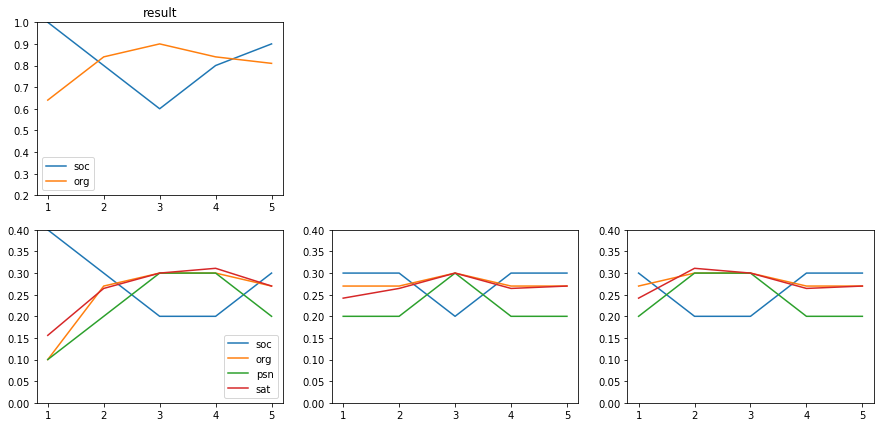

['0' 'search' 'search' 'conserve' 'search']
['0' 'conserve' 'search' 'search' 'conserve']
['0' 'search' 'conserve' 'search' 'conserve']


In [1]:
#１つのログを表示
import numpy as np
import mysql.connector
import scipy.signal as signal
from matplotlib.pyplot import show
import matplotlib.pyplot as plt
import scipy
import scipy.spatial.distance as distance
from scipy.cluster.hierarchy import linkage, dendrogram, ward,cut_tree
from random import random
import math

connector = mysql.connector.connect(host='localhost',db='agent_analysis',user='root',password='admin')
cursor = connector.cursor(buffered=True)

sql = "select * from hand_simu_logs where result_org_t2 = 0.87 and result_org_t3 = 0.9 and result_org_t4 = 0.9 limit 6,1"
sql = "select * from hand_simu_logs where result_org_t2 = 0.81and result_org_t3 = 0.9 and result_org_t4 = 0.84 and result_org_t5 = 0.81 and 3_sat_t4=0.764477047 limit 1"
sql = "select * from hand_simu_logs_exe where `group` = 2 limit 14,1"
sql = "select * from hand_simu_logs_tayo_exe where `group` = 2 limit 0,1"

sql = "select * from hand_simu_logs_tayo as a where a.result_soc_t2 = 0.5 and a.result_soc_t3=0.8 and a.result_soc_t4=0.7 and a.result_soc_t5=0.8"
sql = "select * from hand_simu_logs as a where a.flag=1 limit 0,1"
sql = "select * from hand_simu_logs_exe as a where a.`group`=2 and a.1_act_t5='search' and a.result_soc_t5>a.result_org_t5 limit 2,1"

num=cursor.execute(sql)
data_one = np.array(cursor.fetchall())[0]

cursor.close()
connector.close()

plt.clf()
plt.figure(figsize=(15, 7))

plt.subplot(2, 3, 1)
plt.plot(range(1,6),data_one[135:140],label='soc')
plt.plot(range(1,6),data_one[140:145],label='org')
plt.ylim(0.2, 1.0)
plt.title("result")
plt.legend()

plt.subplot(2, 3, 4)
plt.plot(range(1,6),data_one[20:25],label='soc')
plt.plot(range(1,6),data_one[25:30],label='org')
plt.plot(range(1,6),data_one[30:35],label='psn')
plt.plot(range(1,6),data_one[35:40],label='sat')
plt.ylim(0, 0.4)
plt.legend()

plt.subplot(2, 3, 5)
plt.plot(range(1,6),data_one[65:70])
plt.plot(range(1,6),data_one[70:75])
plt.plot(range(1,6),data_one[75:80])
plt.plot(range(1,6),data_one[80:85])
plt.ylim(0, 0.4)

plt.subplot(2, 3, 6)
plt.plot(range(1,6),data_one[110:115])
plt.plot(range(1,6),data_one[115:120])
plt.plot(range(1,6),data_one[120:125])
plt.plot(range(1,6),data_one[125:130])
plt.ylim(0, 0.4)

plt.show()

print(data_one[15:20])
print(data_one[60:65])
print(data_one[105:110])


In [38]:
import numpy as np
import mysql.connector
import scipy.signal as signal
from matplotlib.pyplot import show
import matplotlib.pyplot as plt
import scipy
import scipy.spatial.distance as distance
from scipy.cluster.hierarchy import linkage, dendrogram, ward,cut_tree
from random import random
import math
connector = mysql.connector.connect(host='localhost',db='agent_analysis',user='root',password='admin')
cursor = connector.cursor(buffered=True)

sql = "SELECT * FROM hand_simu_logs"



num=cursor.execute(sql)
data_base = np.array(cursor.fetchall())
data_macro = data_base[:,135:145].astype(np.double)
data_micro = np.concatenate((data_base[:,20:45], data_base[:,65:90],data_base[:,110:135]), axis=1).astype(np.double)
data_decision = np.concatenate((data_base[:,15:20], data_base[:,60:65],data_base[:,105:110]), axis=1).astype(np.str)

cursor.close()
connector.close()

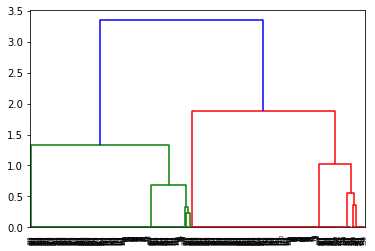

In [39]:
import dtw_distance as dtw

target = 6469
x = []
y = []
#tayoの値
#dif = 7000

dif = 0

for i in range(len(data_macro[dif:dif+500])):
    for j in range(i+1,len(data_macro[dif:dif+500])):
#        x.append(dtw.dtw_distance(data_macro[i,1:5]-data_macro[i,0:4],data_macro[j,1:5]-data_macro[j,0:4],window=1))
#        y.append(dtw.dtw_distance(data_macro[i,6:10]-data_macro[i,5:9],data_macro[j,6:10]-data_macro[i,5:9],window=1))
        x.append(dtw.dtw_distance(data_macro[i+dif,0: 5],data_macro[j+dif,0: 5],window=1))
        y.append(dtw.dtw_distance(data_macro[i+dif,5:10],data_macro[j+dif,5:10],window=1))

#macro_dist = np.sqrt(np.array(x)*np.array(x) +  np.array(y)*np.array(y))
macro_dist = np.array(x)+np.array(y)
#macro_dist = macro_dist - min(macro_dist)
result = linkage(macro_dist, method='ward')
dendrogram(result)
show()

#plt.clf()
#plt.figure(figsize=(7, 7))
#plt.scatter(x, y, marker = 'o')
#plt.show()

#import dtw_distance as dtw

#target = 6469
#x = []
#y = []
#z = []
#for i in range(len(data_macro[0:400])):
#    for j in range(i+1,len(data_macro[0:400])):
#        x.append(dtw.dtw_distance(data_micro[i,20:25],data_micro[j,20:25],window=1))
#        y.append(dtw.dtw_distance(data_micro[i,45:50],data_micro[j,45:50],window=1))
#        z.append(dtw.dtw_distance(data_micro[i,70:75],data_micro[j,70:75],window=1))

#micro_dist = np.array(x)+np.array(y)+np.array(z)
#result = linkage(np.array(x)+np.array(y)+np.array(z), method='ward')
#dendrogram(result)
#show()

190
240
70


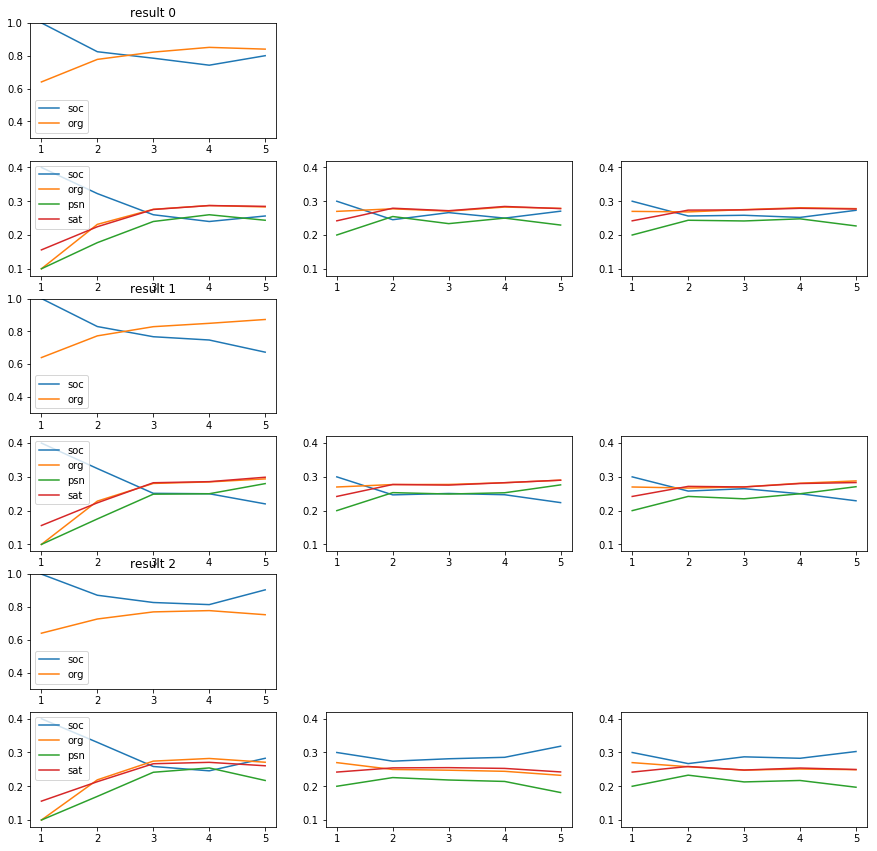

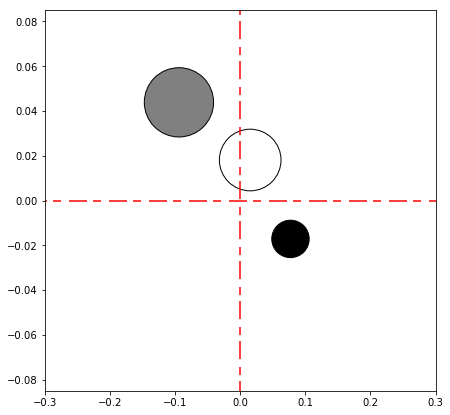

In [41]:
div_n = 3

joint_macro =  np.concatenate((data_macro[0+dif:500+dif], cut_tree(result, div_n)), axis=1)
joint_micro =  np.concatenate((data_micro[0+dif:500+dif], cut_tree(result, div_n)), axis=1)
joint_decision =  np.concatenate((data_decision[0+dif:500+dif], cut_tree(result, div_n)), axis=1)


data =  np.concatenate((data_base[dif:dif+500], cut_tree(result, div_n)), axis=1)
np.savetxt('output.csv', data,delimiter=',',fmt='%s')


plt.clf()
plt.figure(figsize=(15, 10*math.ceil(div_n)))


for n in range(div_n):

    joint_d = joint_macro[joint_macro[:,10]==n]
    print(len(joint_d))
    plt.subplot(6*math.ceil(div_n/2), 3, 6*n+1)
    plt.plot(range(1,6),np.average(joint_d, axis=0)[:5],label='soc')
    plt.plot(range(1,6),np.average(joint_d, axis=0)[5:10],label='org')
    plt.title("result " + str(n))
    plt.ylim(0.3,1.0)
    plt.legend()
    
    joint_d = joint_micro[joint_micro[:,75]==n]
    plt.subplot(6*math.ceil(div_n/2), 3, 6*n+4)
    plt.plot(range(1,6),np.average(joint_d, axis=0)[0:5],label='soc')
    plt.plot(range(1,6),np.average(joint_d, axis=0)[5:10],label='org')
    plt.plot(range(1,6),np.average(joint_d, axis=0)[10:15],label='psn')
    plt.plot(range(1,6),np.average(joint_d, axis=0)[15:20],label='sat')
    plt.ylim(0.08,0.42)
    plt.legend()

    plt.subplot(6*math.ceil(div_n/2), 3, 6*n+5)
    plt.plot(range(1,6),np.average(joint_d, axis=0)[25:30])
    plt.plot(range(1,6),np.average(joint_d, axis=0)[30:35])
    plt.plot(range(1,6),np.average(joint_d, axis=0)[35:40])
    plt.plot(range(1,6),np.average(joint_d, axis=0)[40:45])
    plt.ylim(0.08,0.42)
    
    plt.subplot(6*math.ceil(div_n/2), 3, 6*n+6)
    plt.plot(range(1,6),np.average(joint_d, axis=0)[50:55])
    plt.plot(range(1,6),np.average(joint_d, axis=0)[55:60])
    plt.plot(range(1,6),np.average(joint_d, axis=0)[60:65])
    plt.plot(range(1,6),np.average(joint_d, axis=0)[65:70])
    plt.ylim(0.08,0.42)
    
    plt.xticks([1,2,3,4,5])
plt.show()

from sklearn import manifold

data_macro_ave = []
data_micro_ave = []
mark_size = []
for n in range(div_n):
    joint_macro_d = joint_macro[joint_macro[:,10]==n]
    data_macro_ave.append(np.average(joint_macro_d, axis=0)[:10])
    mark_size.append(10000*(len(joint_macro_d)/len(joint_macro)))

    
dist_macro = distance.squareform(distance.pdist(data_macro_ave))

dist_soc = [0,dtw.dtw_distance(data_macro_ave[1][0:5],data_macro_ave[0][0:5],window=1),dtw.dtw_distance(data_macro_ave[1][0:5],data_macro_ave[2][0:5],window=1)]
dist_org = [0,dtw.dtw_distance(data_macro_ave[1][5:10],data_macro_ave[0][5:10],window=1),dtw.dtw_distance(data_macro_ave[1][5:10],data_macro_ave[2][5:10],window=1)]
dist_soc = [data_macro_ave[0][4],data_macro_ave[1][4],data_macro_ave[2][4]]
dist_org = [data_macro_ave[0][9],data_macro_ave[1][9],data_macro_ave[2][9]]
dist_soc = [data_macro_ave[0][4]-data_macro_ave[0][2],data_macro_ave[1][4]-data_macro_ave[1][2],data_macro_ave[2][4]-data_macro_ave[2][2]]
dist_org = [data_macro_ave[0][9]-data_macro_ave[0][7],data_macro_ave[1][9]-data_macro_ave[1][7],data_macro_ave[2][9]-data_macro_ave[2][7]]



plt.clf()
plt.figure(figsize=(7, 7))
plt.scatter(dist_soc, dist_org,s=mark_size, marker = 'o',facecolor=['w','gray','k'],edgecolor=['k','k','k'])
 
#for label, x, y in zip(range(div_n), dist_soc,dist_org):
#   plt.annotate(
#       label,
#       xy = (x, y), xytext = (2, -5),
#       textcoords = 'offset points', ha = 'right', va = 'bottom')

plt.xlim(0.6,0.95)
plt.ylim(0.74,0.9)
plt.xlim(-0.12,0.12)
plt.ylim(-0.12,0.12)
plt.xlim(-0.3,0.3)
plt.ylim(-0.085,0.085)
plt.vlines(np.average(joint_macro, axis=0)[4],0,20,linestyles=[(0,(9,3,4,4))],colors='r')
plt.hlines(np.average(joint_macro, axis=0)[9],0,20,linestyles=[(0,(9,3,4,4))],colors='r')
plt.vlines(0,-1,1,linestyles=[(0,(9,3,4,4))],colors='r')
plt.hlines(0,-1,1,linestyles=[(0,(9,3,4,4))],colors='r')
plt.show()

#ファイル出力用
#data = joint_decision[joint_decision[:,len(joint_decision[0])-1] != '0']
#np.savetxt('ichiyo_0_exclude.csv', data,delimiter=',',fmt='%s')
#data = joint_decision[joint_decision[:,len(joint_decision[0])-1] != '1']
#np.savetxt('ichiyo_1_exclude.csv', data,delimiter=',',fmt='%s')
#data = joint_decision[joint_decision[:,len(joint_decision[0])-1] != '2']
#np.savetxt('ichiyo_2_exclude.csv', data,delimiter=',',fmt='%s')

In [15]:
div_n = 3
joint_macro =  np.concatenate((data_macro, cut_tree(result, div_n)), axis=1)
joint_micro =  np.concatenate((data_micro, cut_tree(result, div_n)), axis=1)

from sklearn import manifold

data_macro_ave = []
data_micro_ave = []
mark_size = []
for n in range(div_n):
    joint_macro_d = joint_macro[joint_macro[:,10]==n]
    data_macro_ave.append(np.average(joint_macro_d, axis=0)[:10])
    mark_size.append(10000*(len(joint_macro_d)/len(joint_macro)))

    joint_micro_d = joint_micro[joint_micro[:,75]==n]
    data_micro_ave.append(np.average(joint_micro_d, axis=0)[:75])
    
dist_micro = distance.squareform(distance.pdist(data_micro_ave))
dist_macro = distance.squareform(distance.pdist(data_macro_ave))

for i in range(len(data_macro[0:400])):
    for j in range(i+1,len(data_macro[0:400])):
        x.append(dtw.dtw_distance(data_micro[i,20:25],data_micro[j,20:25],window=1))
        y.append(dtw.dtw_distance(data_micro[i,45:50],data_micro[j,45:50],window=1))
        z.append(dtw.dtw_distance(data_micro[i,70:75],data_micro[j,70:75],window=1))


plt.clf()
plt.figure(figsize=(7, 7))
plt.scatter(dist_micro[target], dist_macro[target],s=mark_size, marker = 'o')
 
for label, x, y in zip(range(div_n), dist_micro[target], dist_macro[target]):
   plt.annotate(
       label,
       xy = (x, y), xytext = (2, -5),
       textcoords = 'offset points', ha = 'right', va = 'bottom')
plt.show()

ValueError: all the input array dimensions except for the concatenation axis must match exactly

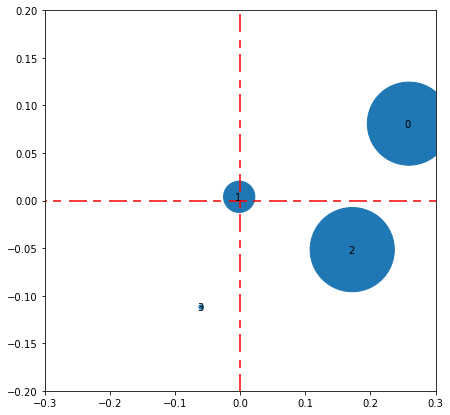

In [647]:
connector = mysql.connector.connect(host='localhost',db='agent_analysis',user='root',password='admin')
cursor = connector.cursor(buffered=True)

sql = "SELECT * FROM hand_simu_logs_tayo"



num=cursor.execute(sql)
data_base = np.array(cursor.fetchall())
data_macro = data_base[:,135:145].astype(np.double)
data_micro = np.concatenate((data_base[:,20:45], data_base[:,65:90],data_base[:,110:135]), axis=1).astype(np.double)
data_decision = np.concatenate((data_base[:,15:20], data_base[:,60:65],data_base[:,105:110]), axis=1).astype(np.str)

cursor.close()
connector.close()

from sklearn import manifold


data1 = data_macro[(data_macro[:,4]-data_macro[:,2] > 0) & (data_macro[:,9]-data_macro[:,7] >= 0)]
data2 = data_macro[(data_macro[:,4]-data_macro[:,2] <= 0) & (data_macro[:,9]-data_macro[:,7] >= 0)]
data3 = data_macro[(data_macro[:,4]-data_macro[:,2] > 0) & (data_macro[:,9]-data_macro[:,7] < 0)]
data4 = data_macro[(data_macro[:,4]-data_macro[:,2] <= 0) & (data_macro[:,9]-data_macro[:,7] < 0)]

mark_size  = [len(data1),len(data2),len(data3),len(data4)]


dist_soc = [np.average(data1[:,4]-data1[:,2],axis=0),np.average(data2[:,4]-data2[:,2],axis=0),np.average(data3[:,4]-data3[:,2],axis=0),np.average(data4[:,4]-data4[:,2],axis=0)]
dist_org = [np.average(data1[:,9]-data1[:,7],axis=0),np.average(data2[:,9]-data2[:,7],axis=0),np.average(data3[:,9]-data3[:,7],axis=0),np.average(data4[:,9]-data4[:,7],axis=0)]
    
    
plt.clf()
plt.figure(figsize=(7, 7))
plt.scatter(dist_soc, dist_org,s=mark_size, marker = 'o')
 
for label, x, y in zip(range(div_n), dist_soc,dist_org):
   plt.annotate(
       label,
       xy = (x, y), xytext = (2, -5),
       textcoords = 'offset points', ha = 'right', va = 'bottom')

plt.xlim(0.6,0.95)
plt.ylim(0.74,0.9)
plt.xlim(-0.12,0.12)
plt.ylim(-0.12,0.12)
plt.xlim(-0.3,0.3)
plt.ylim(-0.2,0.2)
plt.vlines(0,-1,1,linestyles=[(0,(9,3,4,4))],colors='r')
plt.hlines(0,-1,1,linestyles=[(0,(9,3,4,4))],colors='r')
plt.show()

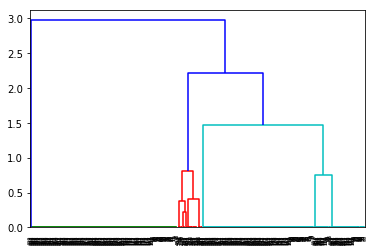

243
220
37


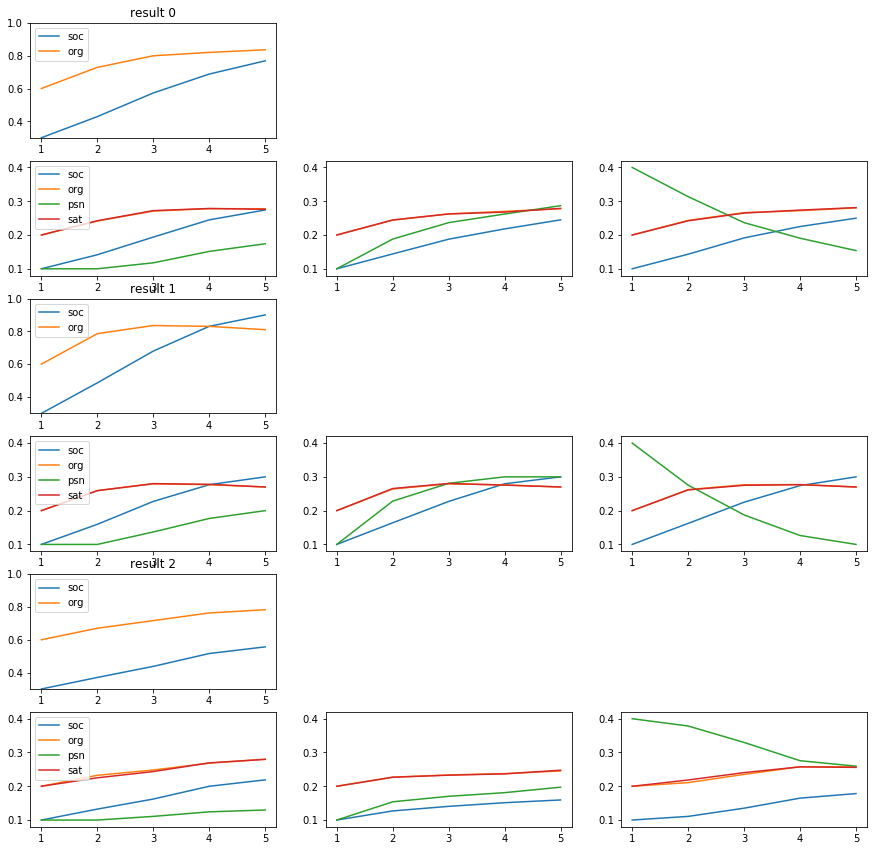

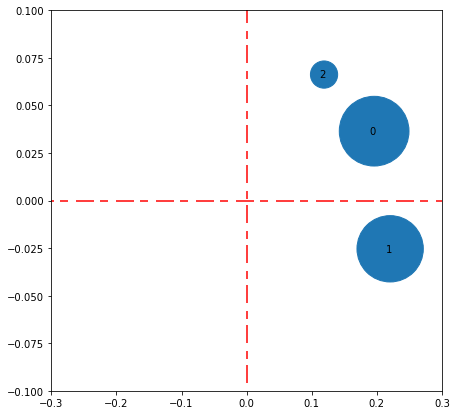

2000


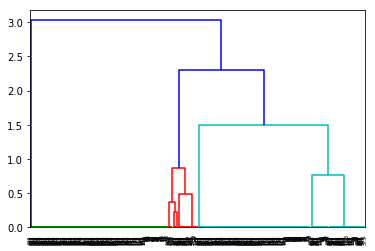

249
206
45


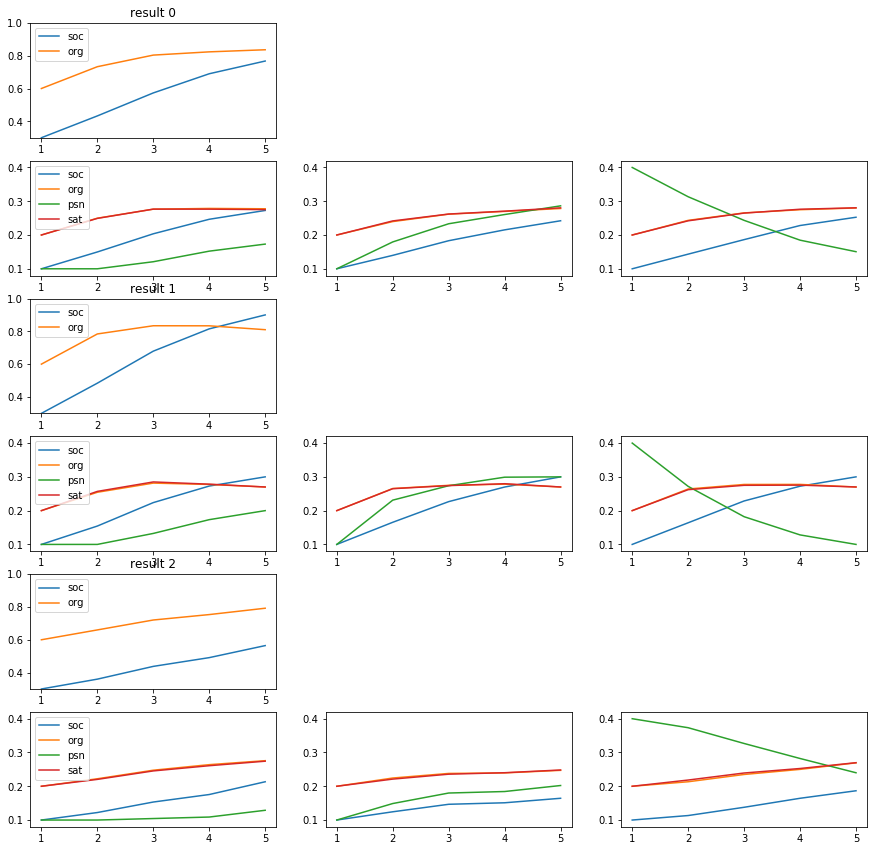

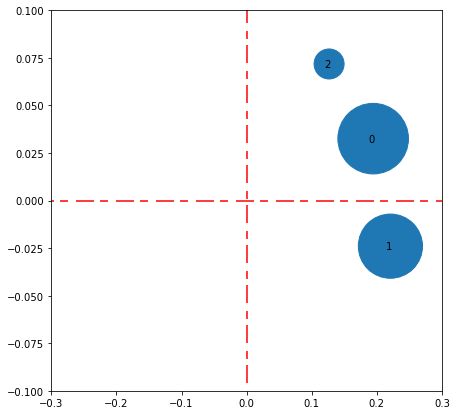

7000


In [31]:
import dtw_distance as dtw
from sklearn import manifold

target = 6469

#tayoの値
#dif = 2500

for dif in [0,500,1000,1500,2000,2500,3000,3500,4000,4500,5000,5500,6000,6500,7000,7500,8000,8500,9000,9500]:
    x = []
    y = []
    for i in range(len(data_macro[dif:dif+500])):
        for j in range(i+1,len(data_macro[dif:dif+500])):
            x.append(dtw.dtw_distance(data_macro[i+dif,0: 5],data_macro[j+dif,0: 5],window=1))
            y.append(dtw.dtw_distance(data_macro[i+dif,5:10],data_macro[j+dif,5:10],window=1))

    macro_dist = np.array(x)+np.array(y)
    result = linkage(macro_dist, method='ward')
    dendrogram(result)
    show()

    div_n = 3

    joint_macro =  np.concatenate((data_macro[0+dif:500+dif], cut_tree(result, div_n)), axis=1)
    joint_micro =  np.concatenate((data_micro[0+dif:500+dif], cut_tree(result, div_n)), axis=1)

    plt.clf()
    plt.figure(figsize=(15, 10*math.ceil(div_n)))


    for n in range(div_n):

        joint_d = joint_macro[joint_macro[:,10]==n]
        print(len(joint_d))
        plt.subplot(6*math.ceil(div_n/2), 3, 6*n+1)
        plt.plot(range(1,6),np.average(joint_d, axis=0)[:5],label='soc')
        plt.plot(range(1,6),np.average(joint_d, axis=0)[5:10],label='org')
        plt.title("result " + str(n))
        plt.ylim(0.3,1.0)
        plt.legend()

        joint_d = joint_micro[joint_micro[:,75]==n]
        plt.subplot(6*math.ceil(div_n/2), 3, 6*n+4)
        plt.plot(range(1,6),np.average(joint_d, axis=0)[0:5],label='soc')
        plt.plot(range(1,6),np.average(joint_d, axis=0)[5:10],label='org')
        plt.plot(range(1,6),np.average(joint_d, axis=0)[10:15],label='psn')
        plt.plot(range(1,6),np.average(joint_d, axis=0)[15:20],label='sat')
        plt.ylim(0.08,0.42)
        plt.legend()

        plt.subplot(6*math.ceil(div_n/2), 3, 6*n+5)
        plt.plot(range(1,6),np.average(joint_d, axis=0)[25:30])
        plt.plot(range(1,6),np.average(joint_d, axis=0)[30:35])
        plt.plot(range(1,6),np.average(joint_d, axis=0)[35:40])
        plt.plot(range(1,6),np.average(joint_d, axis=0)[40:45])
        plt.ylim(0.08,0.42)

        plt.subplot(6*math.ceil(div_n/2), 3, 6*n+6)
        plt.plot(range(1,6),np.average(joint_d, axis=0)[50:55])
        plt.plot(range(1,6),np.average(joint_d, axis=0)[55:60])
        plt.plot(range(1,6),np.average(joint_d, axis=0)[60:65])
        plt.plot(range(1,6),np.average(joint_d, axis=0)[65:70])
        plt.ylim(0.08,0.42)

        plt.xticks([1,2,3,4,5])
    plt.show()

    data_macro_ave = []
    data_micro_ave = []
    mark_size = []
    for n in range(div_n):
        joint_macro_d = joint_macro[joint_macro[:,10]==n]
        data_macro_ave.append(np.average(joint_macro_d, axis=0)[:10])
        mark_size.append(10000*(len(joint_macro_d)/len(joint_macro)))


    dist_macro = distance.squareform(distance.pdist(data_macro_ave))

    dist_soc = [data_macro_ave[0][4]-data_macro_ave[0][2],data_macro_ave[1][4]-data_macro_ave[1][2],data_macro_ave[2][4]-data_macro_ave[2][2]]
    dist_org = [data_macro_ave[0][9]-data_macro_ave[0][7],data_macro_ave[1][9]-data_macro_ave[1][7],data_macro_ave[2][9]-data_macro_ave[2][7]]



    plt.clf()
    plt.figure(figsize=(7, 7))
    plt.scatter(dist_soc, dist_org,s=mark_size, marker = 'o')

    for label, x, y in zip(range(div_n), dist_soc,dist_org):
       plt.annotate(
           label,
           xy = (x, y), xytext = (2, -5),
           textcoords = 'offset points', ha = 'right', va = 'bottom')

    plt.xlim(0.6,0.95)
    plt.ylim(0.74,0.9)
    plt.xlim(-0.12,0.12)
    plt.ylim(-0.12,0.12)
    plt.xlim(-0.3,0.3)
    plt.ylim(-0.1,0.1)
    plt.vlines(np.average(joint_macro, axis=0)[4],0,20,linestyles=[(0,(9,3,4,4))],colors='r')
    plt.hlines(np.average(joint_macro, axis=0)[9],0,20,linestyles=[(0,(9,3,4,4))],colors='r')
    plt.vlines(0,-1,1,linestyles=[(0,(9,3,4,4))],colors='r')
    plt.hlines(0,-1,1,linestyles=[(0,(9,3,4,4))],colors='r')
    plt.show()
    print(dif)

In [2]:
import numpy as np
import mysql.connector
import scipy.signal as signal
from matplotlib.pyplot import show
import matplotlib.pyplot as plt
import scipy
import scipy.spatial.distance as distance
from scipy.cluster.hierarchy import linkage, dendrogram, ward,cut_tree
from random import random
import math